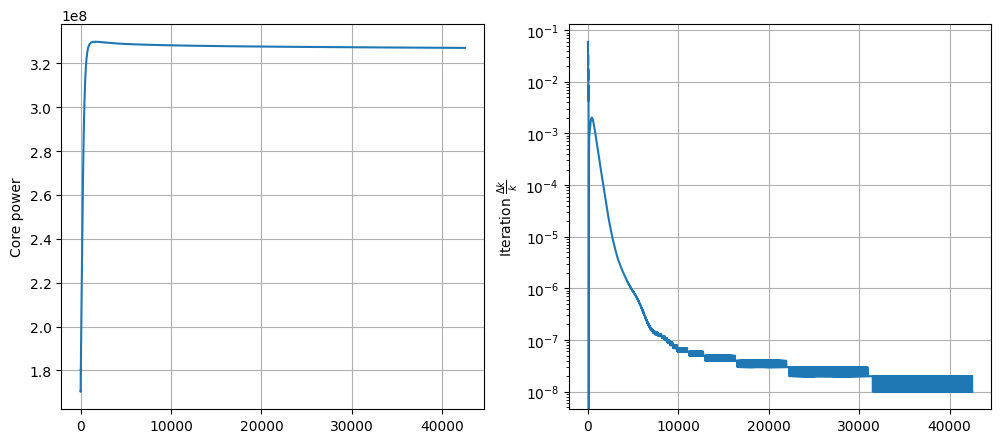

In [1]:
import numpy as np
import matplotlib.pyplot as plt

power = np.loadtxt('./postProcessing/power_core/0/volFieldValue.dat', skiprows=2)

reactor_parameters = np.loadtxt('./postProcessing/reactorParameters/0/reactorParameters.dat', skiprows=2)


fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12,5))

axs[0].plot(power[:,0], power[:,1])
axs[0].set_ylabel('Core power')
axs[0].grid()

dk_over_k_errors = np.abs(reactor_parameters[1:,1] - reactor_parameters[:-1,1]) / reactor_parameters[1:,1]

axs[1].semilogy(reactor_parameters[1:,0], dk_over_k_errors)
axs[1].set_ylabel(r'Iteration $\frac{\Delta k}{k}$')
axs[1].grid()

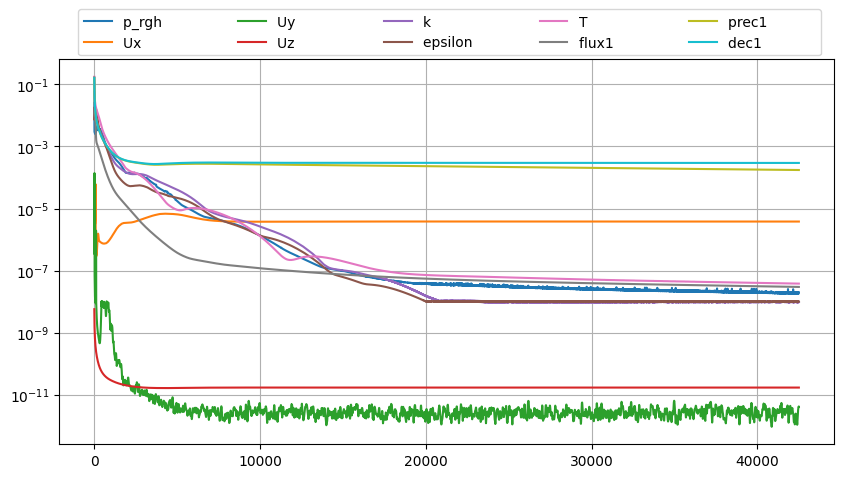

In [2]:
import pandas as pd
residuals = pd.read_csv('./postProcessing/residuals/0/residuals.dat', sep='\t', skiprows=[0, 2])

x = residuals.iloc[:, 0]
y = residuals.iloc[:, 1:]

fig = plt.figure(figsize=(10,5))
# Plotting each column as a separate line
for column in y.columns:
    plt.plot(x, y[column], label=column)

# Adding labels and legend
plt.yscale('log')
plt.legend(ncols=5, loc = (0.025, 1.01))
plt.grid()
plt.show()

# data = np.loadtxt('./postProcessing/residuals/0/residuals.dat', skiprows=3)
# plt.semilogy(residuals[:,0], residuals[:,1:])